# 1. Procesamiento y etiquetado de fondos

Vamos a trabajar con imagenes en escala de grises, cada una con dimensiones de 62 x 47 pıxeles.
Para asegurar coherencia, procesaremos las fotografıas de fondo para que compartan estas propiedades.

En total, contamos con 13.233 imagenes de rostros, de las cuales utilizaremos un 90 % para el entrenamiento, dejandonos aproximadamente 11.909 imagenes de rostros para dicho proposito

Con el objetivo de hacer que nuestro conjunto de datos refleje de manera mas precisa la realidad, donde se requerir a detectar rostros en imagenes donde la mayorıa de los parches seran fondos,hemos decidido que por cada rostro en el conjunto de entrenamiento existan 5 fondos, mientras que en el conjunto de prueba este numero se incrementa a 100.

In [1]:
import matplotlib.pyplot as plt

import code.carga as carga

X_train, X_test, y_train, y_test = carga.get_train_test(5, 100)

print(f'muestras entrenamiento: {X_train.shape}')
print(f'muestras validacion: {X_test.shape}')

muestras entrenamiento: (71357, 62, 47)
muestras validacion: (133521, 62, 47)


## 2. Features HOG

In [2]:
from skimage import feature, data, color

Text(0.5, 1.0, 'Visualización de las HOG features')

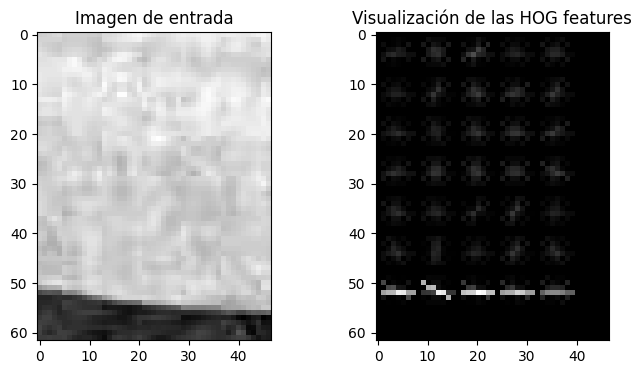

In [3]:
muestra_ejemplo = X_train[0]
hog_features, hog_vis = feature.hog(muestra_ejemplo, visualize=True, feature_vector=False)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(muestra_ejemplo, cmap='gray')
ax[0].set_title('Imagen de entrada')

ax[1].imshow(hog_vis, cmap='gray')
ax[1].set_title('Visualización de las HOG features')

## 3. Comparacion de modelos

 De entre todos los experimentos llevados a cabo, elegimos los tres modelos más destacados principalmente en función de sus métricas de TPR/Recall (tasa de detección de caras, por sus siglas en inglés) y FPR (tasa de falsos positivos).

Dado que nuestro objetivo es maximizar la cantidad de caras detectadas (TPR) y, al mismo tiempo, minimizar los falsos positivos (FPR).

In [ ]:
import pandas as pd
import tabulate

path = './results/results.csv'
df = pd.read_csv(path)

df_fpr = df.sort_values(by=['FPR'], ascending=False)
df_tpr = df.sort_values(by=['TPR'])

results = []

for (fpr, tpr) in (df_fpr, df_tpr):
    if fpr['Classifier'] == tpr['Classifier']:
        results.append()
    
headers = ["Classifier", "Preprocessing", "Accuracy", "Precision", "Recall/TPR", "FPR", "F1-Score", "ROC curve (area)", "Balanced Accuracy", "Time Train"]
print(tabulate(results, headers, tablefmt="grid"))

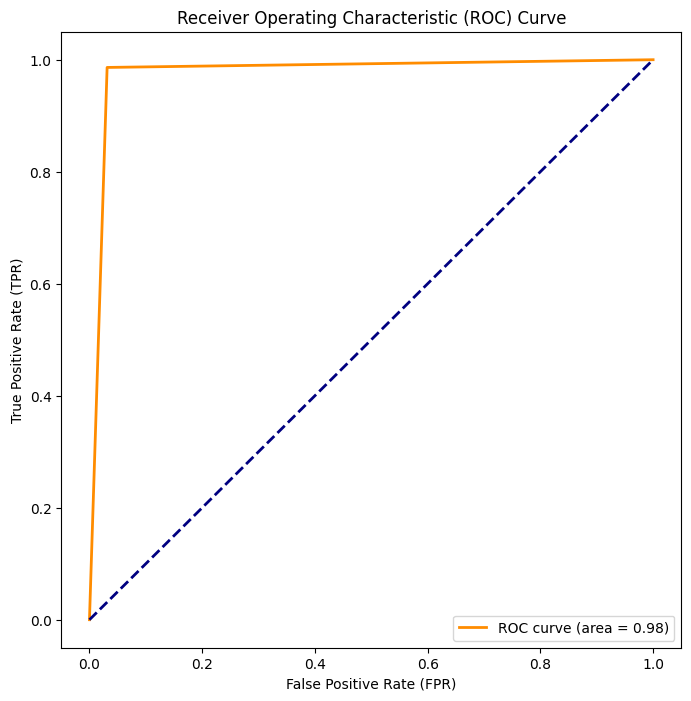

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Supongamos que tienes las probabilidades de predicción y_true y y_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_hog)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


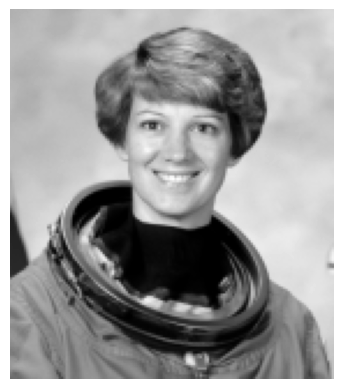

In [4]:
from skimage.transform import  rescale

# Imagen de prueba
test_image = data.astronaut()
test_image = color.rgb2gray(test_image)
test_image = rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.show()

RESULTADOS

In [5]:
import code.face_detector as detector
import numpy as np

positive_patch = carga.positive_patches()[0].shape
# Utiliza la función de ventana deslizante en una imagen de prueba.
indices, patches = zip(*detector.sliding_window(test_image, positive_patch))

# Calcula las características HOG para cada parche y las almacena en un array.
patches_hog = np.array([feature.hog(patch) for patch in patches])

# Muestra la forma del array de características HOG.
patches_hog.shape


(1911, 1215)

In [6]:
from joblib import load

model_saved = load('./model/DTreeClassifier: criterion: entropy, max_depth: 3, min_samples_split: 2, min_samples_leaf: 2, max_features: sqrtHOGPrepocess.pkl')

labels = model_saved.predict(patches_hog)
labels.sum()

ModuleNotFoundError: No module named 'clasifiers'

In [11]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

uploader = widgets.FileUpload(
    accept='.jpg',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

imagen_np = None

def on_file_changed(change):
    global imagen_np
    with output:
        imagen_cargada = change['new']
        # Convertir la lista de bytes en un objeto de imagen usando Pillow
        imagen_pil = Image.open(io.BytesIO(imagen_cargada[0]))

        # Convertir la imagen de Pillow a un array de NumPy
        imagen_np = np.array(imagen_pil)
        print("sdf")

output = widgets.Output()

display(uploader, output)

uploader.observe(on_file_changed, names='data')


FileUpload(value=(), accept='.jpg', description='Upload')

Output()

In [4]:

from PIL import Image
import numpy as np
import io

# Mostrar la forma del array NumPy resultante
print("Forma del array NumPy:", imagen_np.shape)


Forma del array NumPy: (804, 1114, 3)


In [10]:
from PIL import Image
import io
import numpy as np
from skimage import data, color, feature
from skimage.transform import resize, rescale


# Verificar la forma del arreglo NumPy


size = (62, 47)

test_image = imagen_np
print(imagen_np.shape)
test_image = color.rgb2gray(test_image)
#test_image = rescale(test_image, (test_image.shape[0])/18900 )
test_image = test_image[:160, 40:180]
print(test_image.shape)

# Ni, Nj = (int(true_scale*s) for s in size)
# indices = np.array(indices)

(804, 1114, 3)
(160, 140)


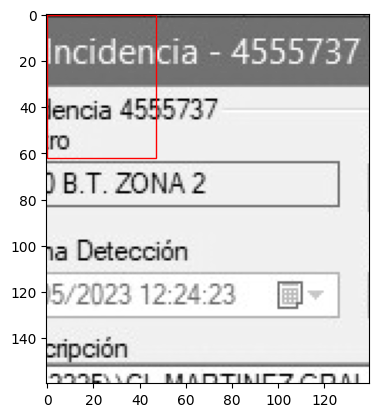

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')

true_scale = 1
Ni, Nj = (int(true_scale * s) for s in size)

ax.add_patch(plt.Rectangle((0, 0), Nj, Ni, edgecolor='red', alpha=1, lw=1, facecolor='none'))
plt.show()